# Equal-Weighted (1/N) Portfolio Allocation

In [7]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

In [9]:
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2017-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

[*********************100%***********************]  4 of 4 completed
Downloaded 501 rows of data.


<AxesSubplot:title={'center':'Stock prices of the considered assets'}, xlabel='Date'>

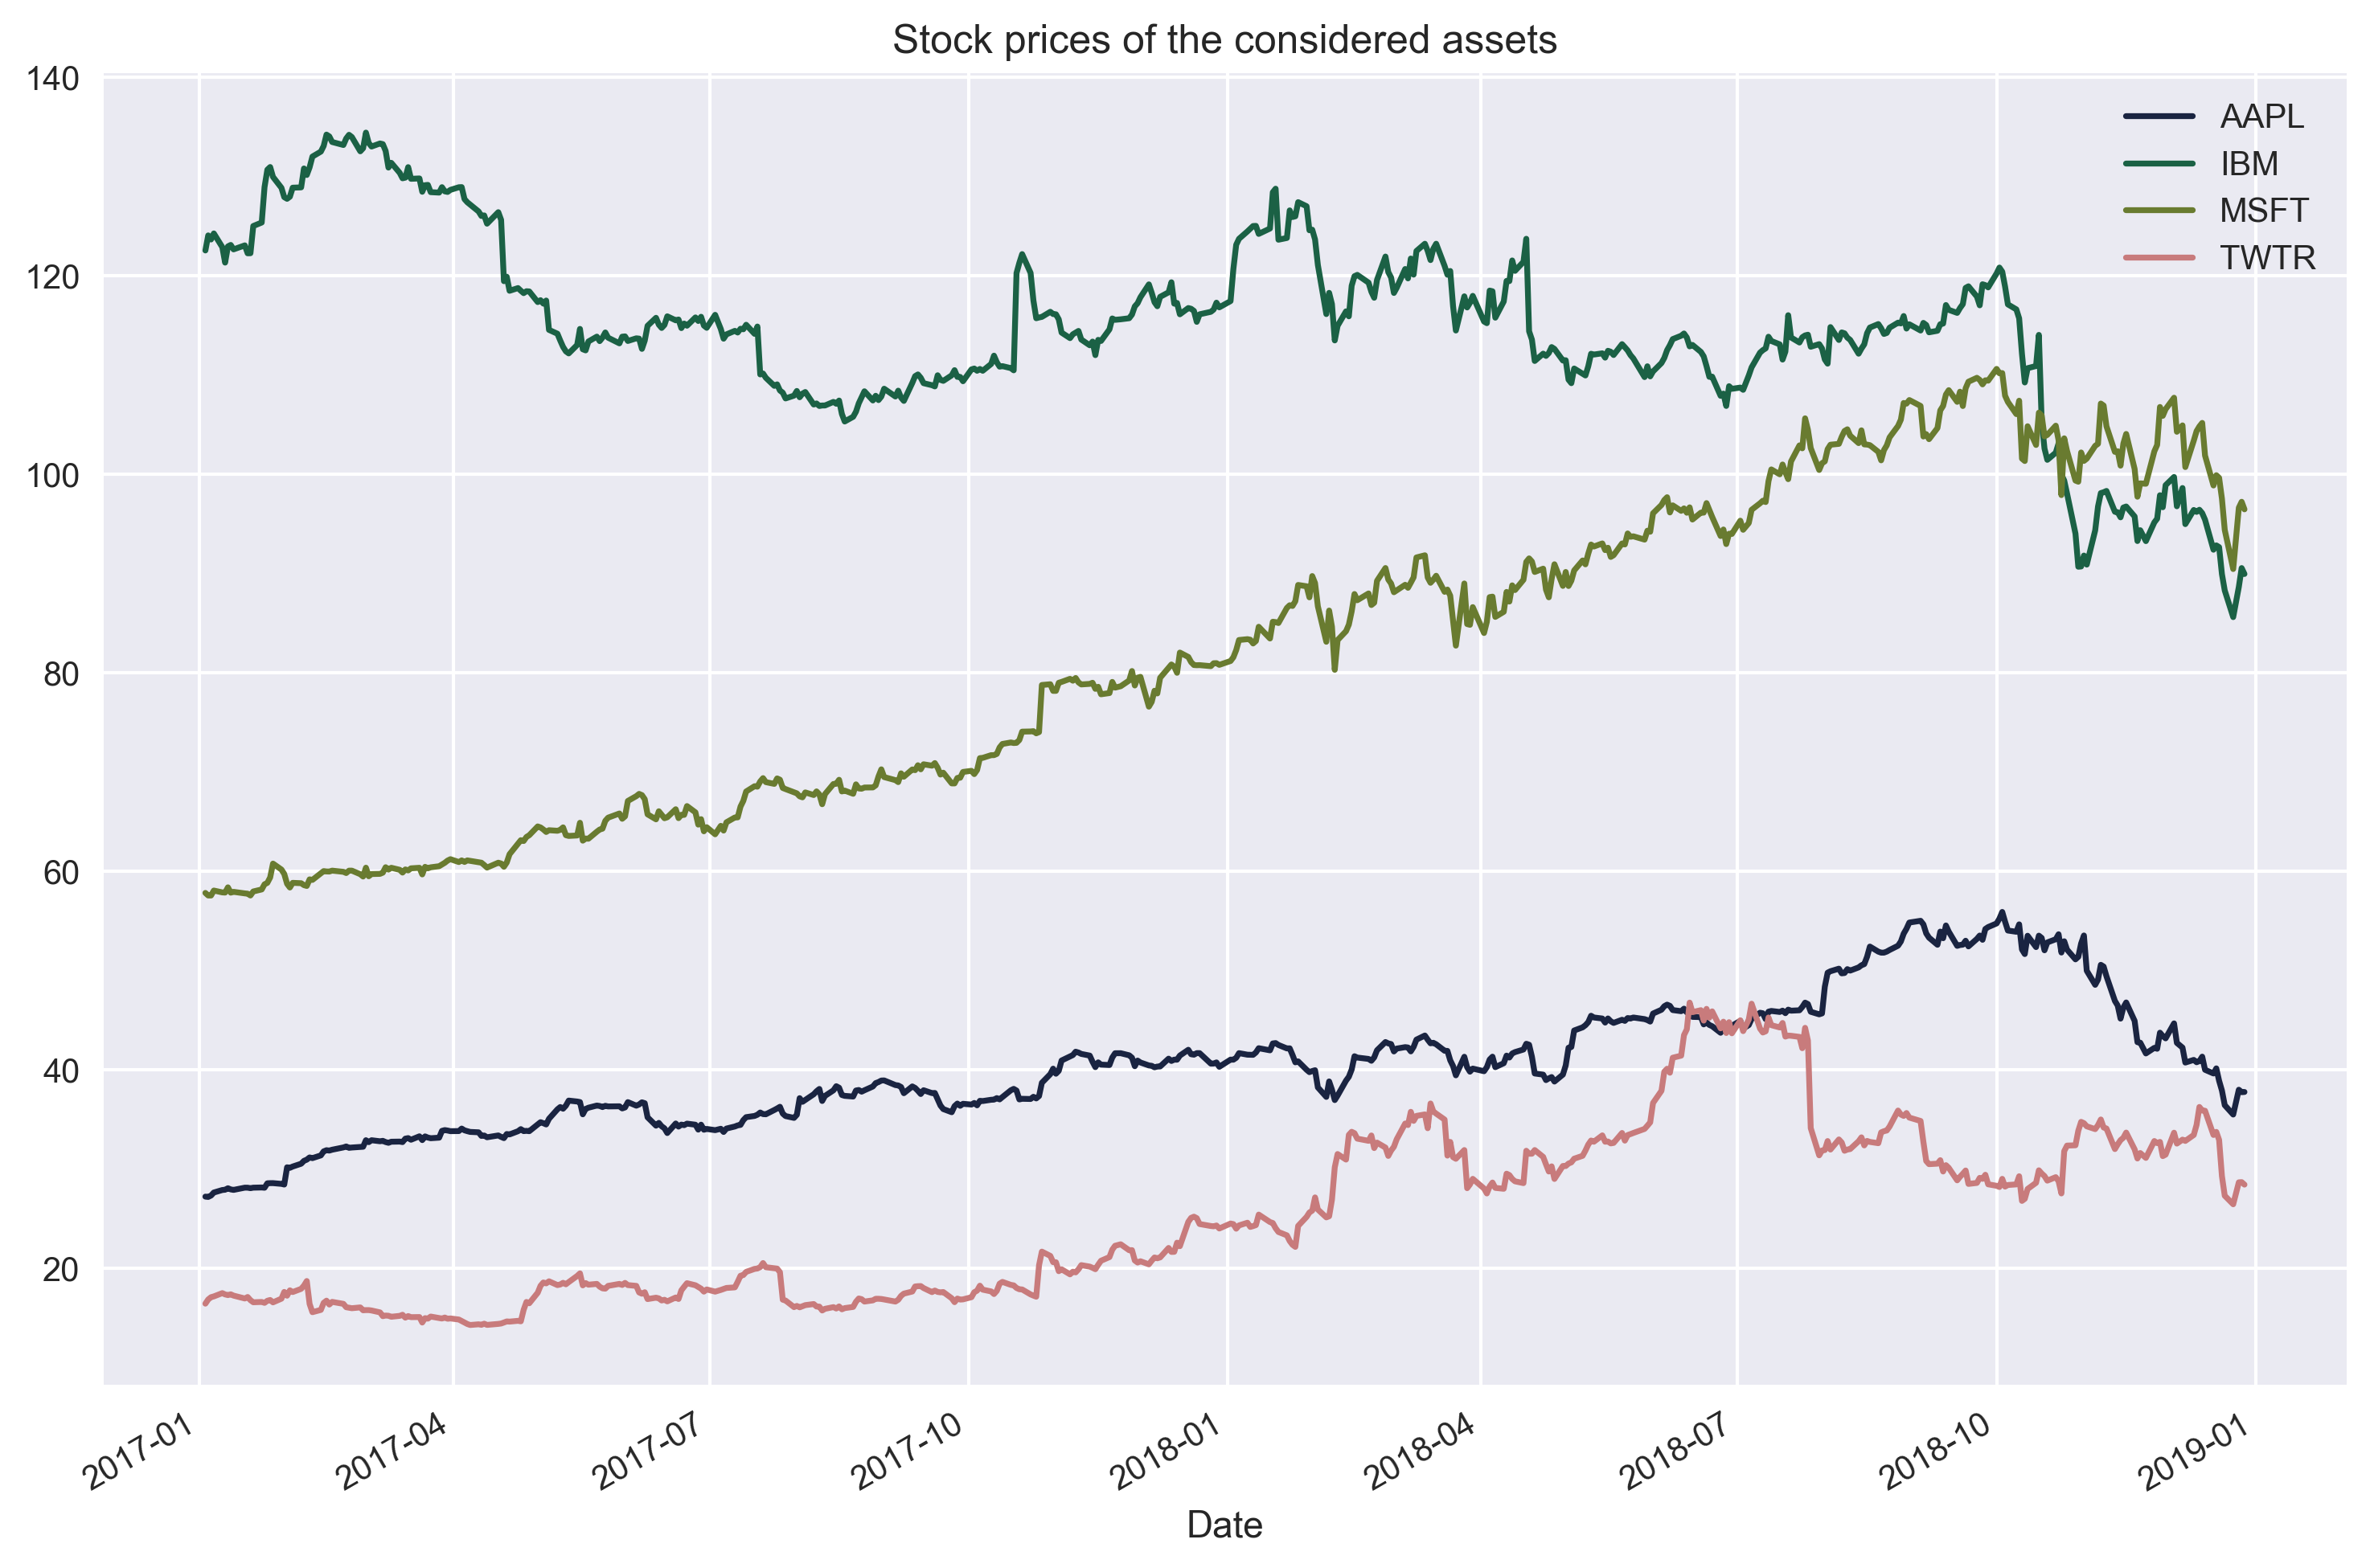

In [10]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [11]:
# Calculate individual asset returns
returns = prices_df['Adj Close'].pct_change().dropna()

# Define the weights
portfolio_weights = n_assets * [1 / n_assets]

# Calculate portfolio returns
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                              index=returns.index)

In [12]:
# Create the tear sheet (simple variant)

pf.create_returns_tear_sheet(portfolio_returns)

Start date,2017-01-04
End date,2018-12-28
Total months,23
,Backtest
Annual return,17.7%
Cumulative returns,38.1%
Annual volatility,21.8%
Sharpe ratio,0.86
Calmar ratio,0.70
Stability,0.87
Max drawdown,-25.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

The most important metrics that we saw in the preceding table are:
- Sharpe ratio: One of the most popular performance evaluation metrics, it measures the excess return (over the risk-free rate) per unit of standard
deviation. When no risk-free rate is provided, the default assumption is that it is equal to 0%. The greater the Sharpe ratio, the better the portfolio's risk-adjusted performance.
- Max drawdown: A metric of the downside risk of a portfolio, it measures the largest peak-to-valley loss (expressed as a percentage) during the course of the
investment. The lower the maximum drawdown, the better.
- Calmar ratio: The ratio is defined as the average annual compounded rate of return divided by the maximum drawdown for that same time period. The
higher the ratio, the better.
- Stability: Measured as the R-squared of a linear fit to the cumulative log returns. In practice, this means regressing a range of integers (serving as the time index)
on cumulative log returns.
- Omega ratio: The probability-weighted ratio of gains over losses for a determined return target threshold (default set to 0). Its main advantage over the
Sharpe ratio is that the Omega ratio—by construction—considers all moments of the returns distribution, while the former only considers the first two (mean and
variance).
- Sortino ratio: A modified version of the Sharpe ratio, where the standard deviation in the denominator is replaced with downside deviation.
- Skew: Skewness measures the degree of asymmetry, that is, how much is the given distribution (here, of portfolio returns) more skewed than the Normal
distribution. Negative skewness (left-skewed distributions) means that large negative returns occur more frequently than large positive ones.
- Kurtosis: Measures extreme values in either of the tails. Distributions with large kurtosis exhibit tail data exceeding the tails of the Gaussian distribution,
meaning that large and small returns occur more frequently.
- Tail ratio: The ratio (absolute) between the 95th and 5th percentile of the daily returns. A tail ratio of ~0.8 means that losses are ~1.25 times as bad as profits.
Daily value at risk: Calculated as μ - 2σ, where μ is the average portfolio return over the period, and σ the corresponding standard deviation.